<a href="https://colab.research.google.com/github/ankitashrivastav12/ML-MODELS/blob/main/Program_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [22]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,InputLayer

In [28]:
train= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [29]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train= train.map(process)
test =test.map(process)

In [30]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=500
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train =train_datagen.flow_from_directory("/content/train", class_mode="binary", batch_size=batch_size, target_size=(128,128))
val = test_datagen.flow_from_directory("/content/test", class_mode="binary", batch_size=batch_size, target_size=(128, 128))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [31]:
model = Sequential()
model.add(InputLayer(input_shape=(128,128, 3)))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history=model.fit_generator(train,steps_per_epoch=20, epochs=10, validation_data=val,validation_steps=8)

<ipython-input-39-eaf0bbeb6434>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train,steps_per_epoch=20, epochs=10, validation_data=val,validation_steps=8)


Epoch 1/10
20/20 [==============================] - 67s 3s/step - loss: 0.6259 - accuracy: 0.6418 - val_loss: 0.6650 - val_accuracy: 0.6223
Epoch 2/10
20/20 [==============================] - 74s 4s/step - loss: 0.6125 - accuracy: 0.6595 - val_loss: 0.5646 - val_accuracy: 0.7053
Epoch 3/10
20/20 [==============================] - 63s 3s/step - loss: 0.5908 - accuracy: 0.6779 - val_loss: 0.6630 - val_accuracy: 0.6540
Epoch 4/10
20/20 [==============================] - 63s 3s/step - loss: 0.5983 - accuracy: 0.6733 - val_loss: 0.6120 - val_accuracy: 0.6963
Epoch 5/10
20/20 [==============================] - 63s 3s/step - loss: 0.5709 - accuracy: 0.6996 - val_loss: 0.5741 - val_accuracy: 0.7010
Epoch 6/10
20/20 [==============================] - 76s 4s/step - loss: 0.5795 - accuracy: 0.6869 - val_loss: 0.5358 - val_accuracy: 0.7322
Epoch 7/10
20/20 [==============================] - 69s 3s/step - loss: 0.5496 - accuracy: 0.7124 - val_loss: 0.6860 - val_accuracy: 0.6403
Epoch 8/10
20/20 [==

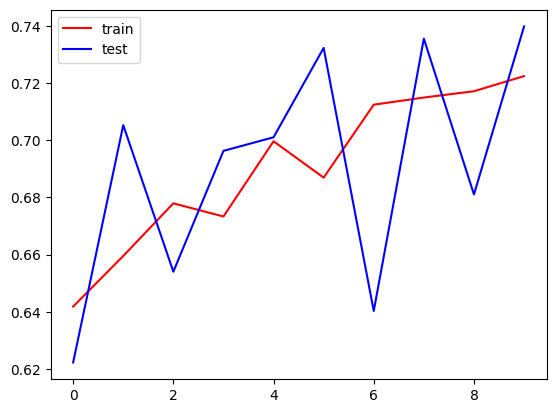

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

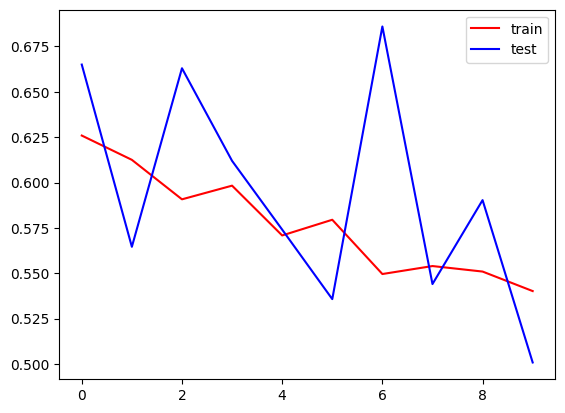

In [43]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()